In [127]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import snscrape.modules.twitter as sntwitter
import re
import flair
import math

In [15]:
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

sentence = flair.data.Sentence('Tesla is declining rapidly')
sentiment_model.predict(sentence)
sentence

2022-05-01 15:58:21,702 loading file C:\Users\007ra\.flair\models\sentiment-en-mix-distillbert_4.pt


Sentence: "Tesla is declining rapidly" → NEGATIVE (0.998)

In [9]:
QUERY = 'natural gas (natural OR gas OR export OR import) until:2015-01-02 since:2015-01-01'
LIMIT = 5

In [26]:
def cleanText(text):
    whitespace = re.compile(r"\s+")
    web_address = re.compile(r"(?i)http(s):\/\/[a-z0-9.~_\-\/]+")
    user = re.compile(r"(?i)@[a-z0-9_]+")
    text = whitespace.sub(' ', text)
    text = web_address.sub('', text)
    text = user.sub('', text)
    text = re.sub(r"(?:@\S*|#\S*|http(?=.*://)\S*)", "", text)
    return text

In [28]:
for tweet in sntwitter.TwitterSearchScraper(QUERY).get_items():
    sentence = flair.data.Sentence(cleanText(tweet.content))
    sentiment_model.predict(sentence)
    print(sentence)

Sentence: "GAS" → NEGATIVE (0.9464)
Sentence: "Natural gas boilers for energy-efficient heating" → POSITIVE (0.9998)
Sentence: "Natural gas pipelines not beneficial for Pa . – Allentown Morning Call" → NEGATIVE (0.9992)
Sentence: "GAS" → NEGATIVE (0.9464)
Sentence: "rates are going up by 6 % . Natural Gas prices down 31 % in 7 weeks ." → NEGATIVE (0.9915)
Sentence: "Natural gas pipelines not beneficial for Pa . – Allentown Morning Call" → NEGATIVE (0.9992)
Sentence: "World : healthy market & amp ; profit growth in Jan 2015 ." → POSITIVE (0.9939)
Sentence: "Maine Natural Gas withdraws its Augusta bid - Press Herald" → NEGATIVE (0.99)
Sentence: "Please RT Unicorn ( UK ) Plumbing & amp ; Heating Bathrooms , Kitchens , Tiling , General Heating , LPG & amp ; Natural Gas Installations 01367 240 160" → NEGATIVE (0.6469)
Sentence: "Petronas to set pace for BC in 2015 . No go-ahead yet but busy natural gas drilling set for Montney $ CVX" → NEGATIVE (0.9762)
Sentence: "Israel ’s Policy Confusion

In [155]:
dataFrame = pd.read_csv('./data/daily.csv')
choppedDF = dataFrame[6200:6250]
print(choppedDF)

           Day  Price
6200  20210813   3.95
6201  20210816   3.93
6202  20210817   3.92
6203  20210818   3.86
6204  20210819   3.83
6205  20210820   3.94
6206  20210823   3.93
6207  20210824   3.95
6208  20210825   4.03
6209  20210826   4.07
6210  20210827   4.35
6211  20210830   4.25
6212  20210831   4.33
6213  20210901   4.45
6214  20210902   4.65
6215  20210903   4.77
6216  20210907   4.71
6217  20210908   4.66
6218  20210909   4.97
6219  20210910   5.13
6220  20210913   5.21
6221  20210914   5.39
6222  20210915   5.66
6223  20210916   5.52
6224  20210917   5.32
6225  20210920   5.25
6226  20210921   4.96
6227  20210922   4.92
6228  20210923   4.94
6229  20210924   5.10
6230  20210927   5.53
6231  20210928   5.94
6232  20210929   5.73
6233  20210930   5.58
6234  20211001   5.61
6235  20211004   5.80
6236  20211005   6.37
6237  20211006   6.00
6238  20211007   5.71
6239  20211008   5.46
6240  20211011   5.46
6241  20211012   5.34
6242  20211013   5.56
6243  20211014   5.92
6244  2021

In [156]:
data = {}
MAX_TWEETS = 25
for item in choppedDF['Day']:
    QUERY = str(item)[:4]+'-'+str(item)[4:6]+'-'+str(item)[6:]
    print(f'checking for {QUERY}')
    curr = 0.0
    nums = 0
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(QUERY).get_items()):
        nums += 1
        if i>MAX_TWEETS:
            break
        sentence = flair.data.Sentence(cleanText(tweet.content))
        sentiment_model.predict(sentence)
        try:
            if(sentence.labels[0].value == 'POSITIVE'):
                curr -= sentence.labels[0].score
            else:
                curr += sentence.labels[0].score
        except:
            pass
    data[QUERY] = curr/nums

checking for 2021-08-13
checking for 2021-08-16
checking for 2021-08-17
checking for 2021-08-18
checking for 2021-08-19
checking for 2021-08-20
checking for 2021-08-23
checking for 2021-08-24
checking for 2021-08-25
checking for 2021-08-26
checking for 2021-08-27
checking for 2021-08-30
checking for 2021-08-31
checking for 2021-09-01
checking for 2021-09-02
checking for 2021-09-03
checking for 2021-09-07
checking for 2021-09-08
checking for 2021-09-09
checking for 2021-09-10
checking for 2021-09-13
checking for 2021-09-14
checking for 2021-09-15
checking for 2021-09-16
checking for 2021-09-17
checking for 2021-09-20
checking for 2021-09-21
checking for 2021-09-22
checking for 2021-09-23
checking for 2021-09-24
checking for 2021-09-27
checking for 2021-09-28
checking for 2021-09-29
checking for 2021-09-30
2022-05-01 22:14:11,990 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-05-01 22:14:12,131 Warning: An empty Sentence was created! Are there empty

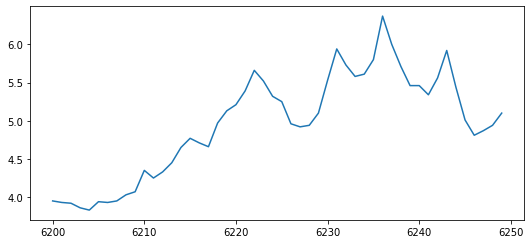

In [157]:
plt.plot(choppedDF['Price'])
# plt.plot(list(data.values()))
plt.show()

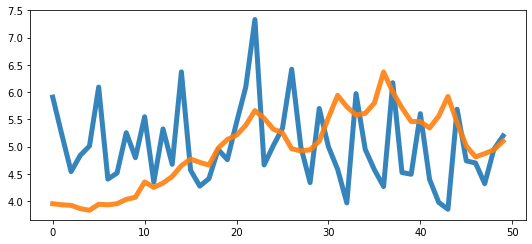

In [160]:
avg = sum(choppedDF['Price'])/len(choppedDF['Price'])
da = list(data.values())
# print(da)
for i in range (len(da)):
    da[i] = (da[i]*avg)+8.5
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
l1 = plt.plot(da, alpha=0.9, lw=5)
l2 = plt.plot(list(choppedDF['Price']), alpha=0.9, lw=5)
plt.show()

In [34]:
data = {}


for i in range(1, 8):
    QUERY = f'natural gas (natural OR gas OR export OR import) until:2015-02-0{i+1} since:2015-01-0{i}'
    print(f'checking for 2015-01-0{i}')
    curr = 0.0
    nums = 0
    for tweet in sntwitter.TwitterSearchScraper(QUERY).get_items():
        nums += 1
        sentence = flair.data.Sentence(cleanText(tweet.content))
        sentiment_model.predict(sentence)
        if(sentence.labels[0].value == 'POSITIVE'):
            curr += sentence.labels[0].score
        else:
            curr -= sentence.labels[0].score
    data[f'2015010{i}'] = curr/nums

checcking for 2015-01-01
checcking for 2015-01-02
checcking for 2015-01-03
checcking for 2015-01-04
checcking for 2015-01-05
checcking for 2015-01-06
checcking for 2015-01-07


In [35]:
print(data)

{'20150101': -0.06037328616854106, '20150102': -0.1086866802819949, '20150103': 0.004111647739839018, '20150104': -0.15060035814748746, '20150105': -0.11034396009236437, '20150106': -0.14251954717270393, '20150107': -0.045708649229295184}


<AxesSubplot:>

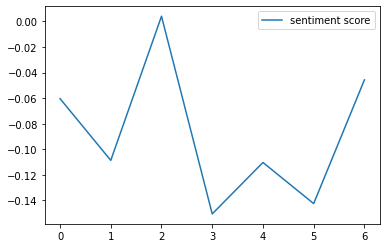

In [61]:
keys = list(data.keys())
vals = list(data.values())

db = {'date': keys, 'sentiment score': vals}
df = pd.DataFrame(data=db)
df.plot()

In [59]:
new = ['20150105', '20150106', '20150107', '20150108']
n = [3.22, 2.98, 3.08, 2.92]

<AxesSubplot:>

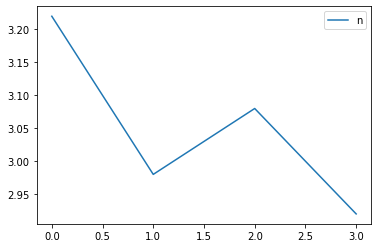

In [60]:
df = pd.DataFrame({'m': new, 'n': n})
df.plot()